In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#import de la bd
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
#Traitement des données
id = df[df["gender"] == "Other"].index
df = df.drop(id)

In [4]:
#Diagramme de conclusion ?

import plotly.express as px

fig = px.sunburst(df, path=['gender', 'smoking_status', 'ever_married', 'stroke'], values='stroke')
fig.show()


In [5]:

# Mapping numerical values to meaningful categories with a default value for unexpected cases
def map_values(column, mapping, default='Unknown'):
    return column.map(lambda x: mapping.get(x, default))

# Define mappings for each column
gender_mapping = {'Male': 'Male', 'Female': 'Female', 'Other': 'Other'}
hypertension_mapping = {0: 'No Hypertension', 1: 'Hypertension'}
heart_disease_mapping = {0: 'No Heart Disease', 1: 'Heart Disease'}
stroke_mapping = {0: 'No Stroke', 1: 'Stroke'}
smoking_status_mapping = {'formerly smoked': 'Formerly Smoked', 'never smoked': 'Never Smoked', 'smokes': 'Smokes'}

# Apply mappings to columns
df['gender'] = map_values(df['gender'], gender_mapping)
df['hypertension'] = map_values(df['hypertension'], hypertension_mapping)
df['heart_disease'] = map_values(df['heart_disease'], heart_disease_mapping)
df['stroke'] = map_values(df['stroke'], stroke_mapping)
df['smoking_status'] = map_values(df['smoking_status'], smoking_status_mapping)

# Grouping and counting occurrences
grouped = df.groupby(['gender', 'hypertension', 'heart_disease', 'smoking_status', 'stroke']).size().reset_index(name='count')

# Calculating the percentage of strokes in the last circle
total_strokes = grouped[grouped['stroke'] == 'Stroke']['count'].sum()
grouped['percentage'] = grouped.apply(lambda row: (row['count'] / total_strokes) * 100 if row['stroke'] == 'Stroke' else None, axis=1)

# Creating the sunburst plot
fig = px.sunburst(grouped, path=['gender', 'hypertension', 'heart_disease', 'smoking_status', 'stroke'], values='percentage')

# Updating layout for better readability
fig.update_layout(
    title="Sunburst Diagram of Stroke Data (Percentage of Strokes)",
    sunburstcolorway=["#636efa", "#EF553B", "#00cc96", "#ab63fa", "#FFA15A", "#19d3f3", "#FF6692"],
)

# Display the plot
fig.show()

In [6]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

id2 = df[df["smoking_status"] == "Unknown"].index
df = df.drop(id2)
# On regroupe les colonnes par ce que l'on souhaite faire avec en renommant les variables
def map_values(column, mapping, default='Unknown'):
    return column.map(lambda x: mapping.get(x, default))

# Définition des fonctions de mapping
hypertension_mapping = {0: 'Pas d\'hypertension', 1: 'Hypertension'}
heart_disease_mapping = {0: 'Pas de maladie cardiaque', 1: 'Maladie cardiaque'}
stroke_mapping = {0: 'Pas d\'AVC', 1: 'AVC'}
residence_type_mapping = {'Urban': 'Citadin', 'Rural': 'Rural'}
gender_mapping = {'Male': 'Homme', 'Female': 'Femme', 'Other': 'Autre'}
smoking_status_mapping = {'formerly smoked': 'Ancien fumeur', 'never smoked': 'Non fumeur', 'smokes': 'Fumeur'}

# On effectue chaque mapping à chaque colonne
df['gender'] = map_values(df['gender'], gender_mapping)
df['hypertension'] = map_values(df['hypertension'], hypertension_mapping)
df['heart_disease'] = map_values(df['heart_disease'], heart_disease_mapping)
df['stroke'] = map_values(df['stroke'], stroke_mapping)
df['smoking_status'] = map_values(df['smoking_status'], smoking_status_mapping)
df['Residence_type'] = map_values(df['Residence_type'], residence_type_mapping)

# On décide de couper la population en deux : les plus ou moins de 50 ans
df['age_group'] = pd.cut(df['age'], bins=[0, 50, float('inf')], labels=['Moins de 50', 'Plus de 50'])

# On les regroupe et on compte les individus par catégorie
grouped = df.groupby(['gender', 'age_group', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke']).size().reset_index(name='count')

# On calcule les pourcentage dans le dernier cercle
total_strokes = grouped[grouped['stroke'] == 'AVC']['count'].sum()
grouped['percentage'] = grouped.apply(lambda row: (row['count'] / total_strokes) * 100 if row['stroke'] == 'AVC' else None, axis=1)


fig = px.sunburst(grouped, path=['gender', 'age_group', 'smoking_status', 'Residence_type', 'hypertension', 'heart_disease', 'stroke'], values='percentage')

fig.update_layout(
    title="Diagramme en anneau représentant le pourcentage d'AVC en fonctions de certaines catégories",
    width=1400,  
    height=1400   
)

fig.show()




C:\Users\littl\AppData\Local\Temp\ipykernel_19016\588531565.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\littl\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\littl\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:1706: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\litt

In [7]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

df_avc = df[df['stroke'] == 1]

df['stroke_marker'] = df['stroke'].replace({0: 'circle', 1: 'x'})

# Tracer le nuage de points avec des marqueurs spécifiques pour les AVC
fig = px.scatter(df, x="avg_glucose_level", y="bmi", color="stroke", hover_name="age", title="IMC par le taux de glucose dans le sang",
                 width=900, height=600, symbol="stroke_marker")

fig.show()

In [8]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

df_avc = df[df['stroke'] == 1]

df['stroke'] = df['stroke'].astype(str)



fig = px.scatter( df, x="avg_glucose_level", y="bmi", color="stroke", hover_name="age", title="IMC par le taux de glucose dans le sang"
                 , width=1000, height=600, color_discrete_sequence=['red', 'blue'], symbol_map={"0": "circle", "1": "x"} )
fig.show()


In [9]:
# Charger les données
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

df_avc = df[df['stroke'] == 1]

df['stroke'] = df['stroke'].astype(str)

# Diviser le DataFrame en deux parties: AVC et non-AVC
df_stroke = df[df['stroke'] == '1']
df_non_stroke = df[df['stroke'] == '0']

# Tracer les points de non-AVC en bleu
fig = px.scatter(df_non_stroke, x="avg_glucose_level", y="bmi", color="stroke", hover_name="age", title="IMC par le taux de glucose dans le sang - Non AVC",
                 width=1000, height=600, symbol="stroke", color_discrete_sequence=['blue'], symbol_map={"0": "circle"})
#fig.update_traces(marker=dict(size=8))

# Ajouter les points de AVC en rouge (à l'avant-plan)
fig.add_trace(px.scatter(df_stroke, x="avg_glucose_level", y="bmi", color="stroke", hover_name="age", title="IMC par le taux de glucose dans le sang - AVC",
                 width=1000, height=600, symbol="stroke", color_discrete_sequence=['red'], symbol_map={"1": "x"}).data[0])

fig.show()




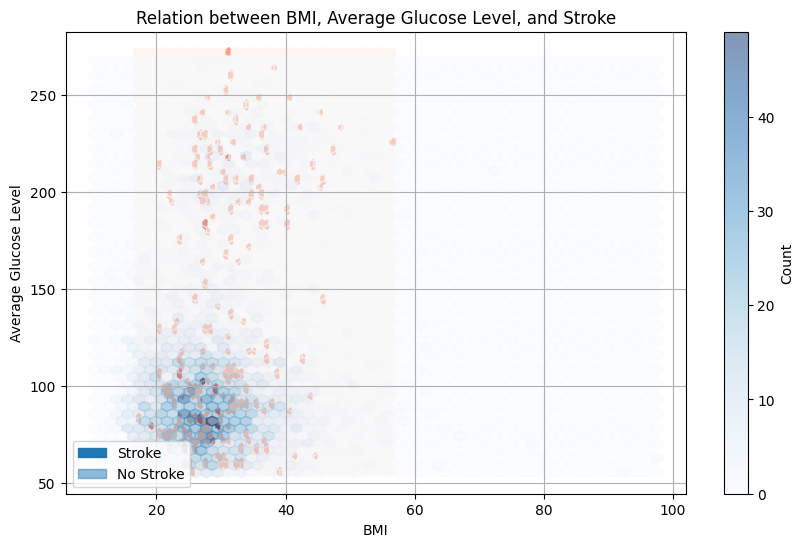

In [18]:
# Charger les données
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

df_avc = df[df['stroke'] == 1]

# Hexbin plot for BMI and average glucose level with stroke occurrence
plt.figure(figsize=(10, 6))
plt.hexbin(df[df['stroke'] == 1]['bmi'], df[df['stroke'] == 1]['avg_glucose_level'], gridsize=50, cmap='Reds', label='Stroke', alpha=1)
plt.hexbin(df[df['stroke'] == 0]['bmi'], df[df['stroke'] == 0]['avg_glucose_level'], gridsize=50, cmap='Blues', label='No Stroke', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Relation between BMI, Average Glucose Level, and Stroke')
plt.colorbar(label='Count')
plt.legend()
plt.grid(True)
plt.show()

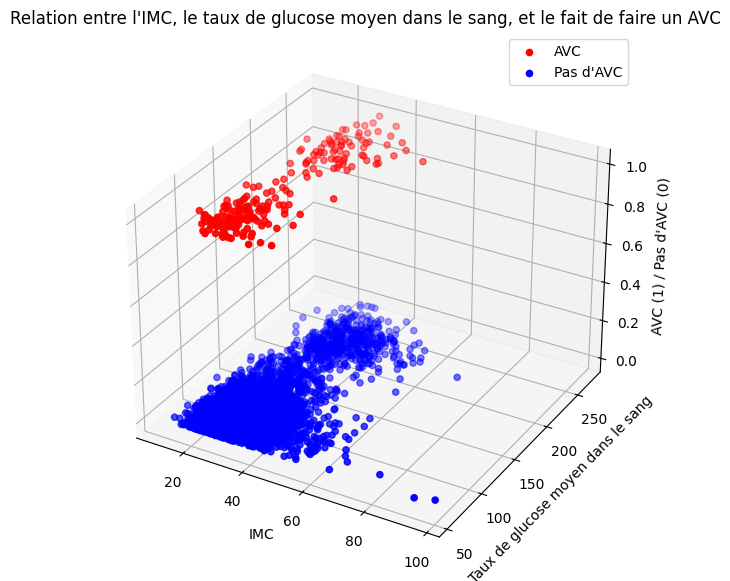

In [24]:


# Charger les données
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

df_avc = df[df['stroke'] == 1]

# Creation d'un plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Affichage des points pour les personnes ou individus victimes d'un AVC
ax.scatter(df[df['stroke'] == 1]['bmi'], df[df['stroke'] == 1]['avg_glucose_level'], zs=1, c='red', marker='o', label='AVC')

# Affichage des points pour les personnes ou individus non victimes d'un AVC
ax.scatter(df[df['stroke'] == 0]['bmi'], df[df['stroke'] == 0]['avg_glucose_level'], zs=0, c='blue', marker='o', label='Pas d\'AVC')

# Titre et légende
ax.set_xlabel('IMC')
ax.set_ylabel('Taux de glucose moyen dans le sang')
ax.set_title('Relation entre l\'IMC, le taux de glucose moyen dans le sang, et le fait de faire un AVC')
ax.legend()

plt.show()

In [65]:
import plotly.graph_objs as go


# Charger les données
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)

df_avc = df[df['stroke'] == 1]

# Affichage des points pour les personnes ou individus victimes d'un AVC
trace_stroke = go.Scatter3d(
    x=df[df['stroke'] == 1]['bmi'],
    y=df[df['stroke'] == 1]['avg_glucose_level'],
    z=[1] * len(df[df['stroke'] == 1]),  
    mode='markers',
    marker=dict(
        color='#FF9900',
        size=5,
        opacity=0.9
    ),
    name='AVC'
)

# Affichage des points pour les personnes ou individus non victimes d'un AVC

trace_no_stroke = go.Scatter3d(
    x=df[df['stroke'] == 0]['bmi'],
    y=df[df['stroke'] == 0]['avg_glucose_level'],
    z=[0] * len(df[df['stroke'] == 0]), 
    mode='markers',
    marker=dict(
        color='#9381FF',
        size=5,
        opacity=0.5
    ),
    name='Pas d\'AVC'
)

#Ajout d'un layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='IMC'),
        yaxis=dict(title='Taux de glucose moyen dans le sang'),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    title='Relation entre IMC, Taux de glucose moyen dans le sang et AVC'
)

fig = go.Figure(data=[trace_stroke, trace_no_stroke], layout=layout)

fig.show()


<Figure size 1500x800 with 0 Axes>

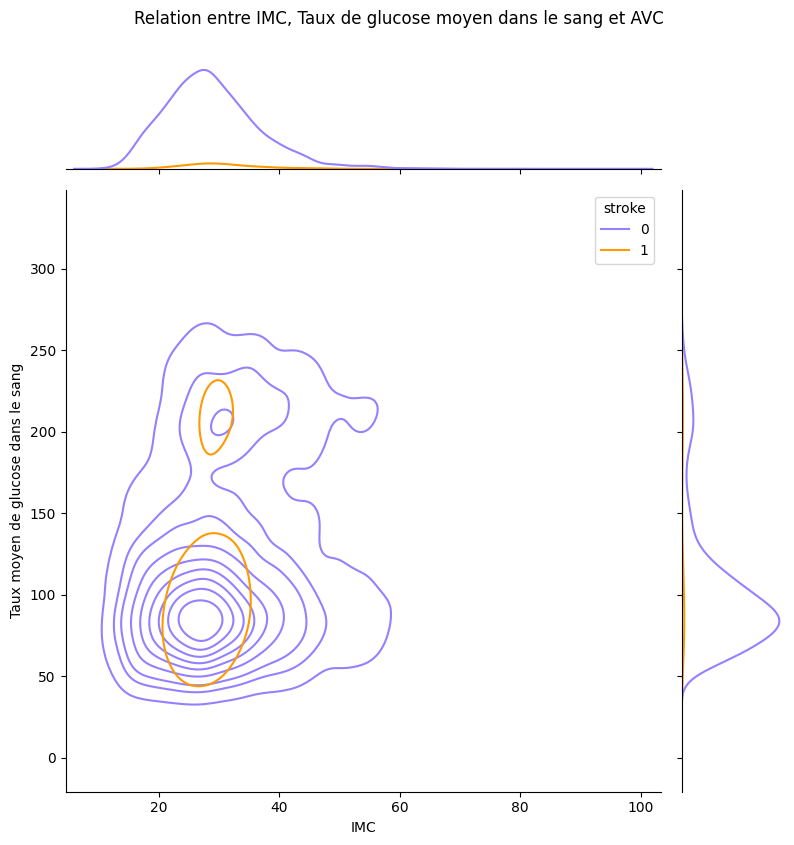

In [64]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
id = df[df["gender"] == "Other"].index
df = df.drop(id)


plt.figure(figsize=(15, 8))
g = sns.jointplot(x='bmi', y='avg_glucose_level', data=df, kind='kde', hue='stroke', height=8, palette={0: "#9381FF", 1: "#FF9900"})
g.set_axis_labels('IMC', 'Taux moyen de glucose dans le sang')
plt.suptitle('Relation entre IMC, Taux de glucose moyen dans le sang et AVC', y=1.05)  
plt.show()

C:\Users\littl\AppData\Local\Temp\ipykernel_19016\3257931328.py:16: UserWarning:

The sizes list has more values (2) than needed (1), which may not be intended.



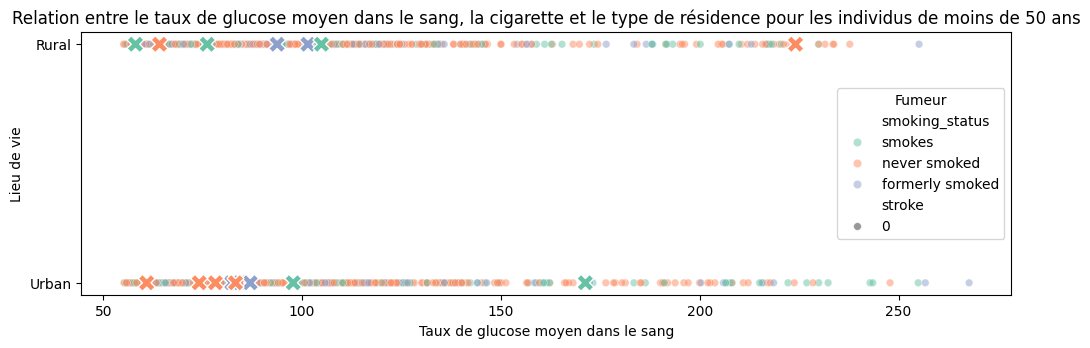

In [76]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df[df["gender"] != "Other"]

df_below_50 = df[df['age'] < 50]


df_below_50_known_smoking = df_below_50[df_below_50['smoking_status'] != 'Unknown']

df_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 1]
df_no_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 0]



#Avec un AVC
plt.figure(figsize=(12, 6))  # Reduce the height of the plot
sns.scatterplot(data=df_no_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette='Set2', size='stroke', sizes=[30, 150], style='stroke', markers=['o'], alpha=0.5)

# Les individus ayant eu un avc
sns.scatterplot(data=df_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette='Set2', size='stroke', sizes=[150], marker='X', zorder=2, legend=False)

plt.title('Relation entre le taux de glucose moyen dans le sang, la cigarette et le type de résidence pour les individus de moins de 50 ans')
plt.xlabel('Taux de glucose moyen dans le sang')
plt.ylabel('Lieu de vie')
plt.legend(title='Fumeur')
plt.gca().set_aspect(60)  # Adjust the aspect ratio to compress the vertical space
plt.show()


C:\Users\littl\AppData\Local\Temp\ipykernel_19016\773728983.py:17: UserWarning:

The sizes list has more values (2) than needed (1), which may not be intended.



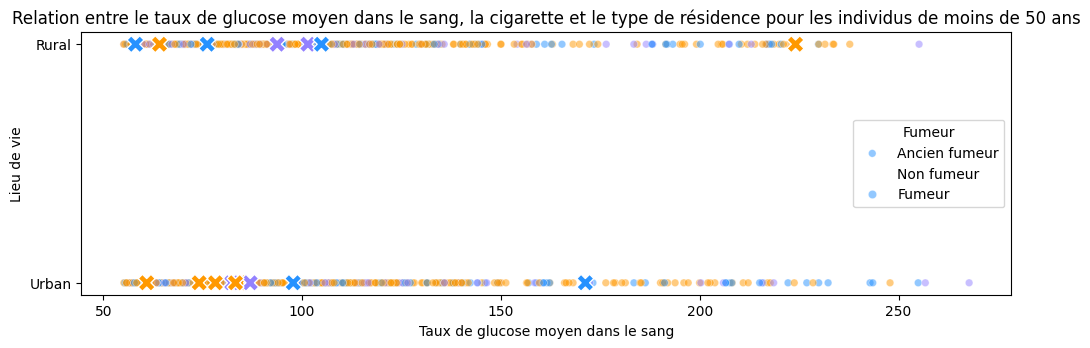

In [75]:
# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df[df["gender"] != "Other"]

df_below_50 = df[df['age'] < 50]

df_below_50_known_smoking = df_below_50[df_below_50['smoking_status'] != 'Unknown']

df_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 1]
df_no_stroke = df_below_50_known_smoking[df_below_50_known_smoking['stroke'] == 0]

# Define custom legend labels for smoking status
legend_labels = {'formerly smoked': 'Ancien fumeur', 'never smoked': 'Non fumeur', 'smokes': 'Fumeur'}

# Scatter plot for individuals without stroke
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_no_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette={'formerly smoked': '#9381FF', 'never smoked': '#FF9900', 'smokes': '#2692FF'},
                size='stroke', sizes=[30, 150], style='stroke', markers=['o'], alpha=0.5)

# Scatter plot for individuals with stroke
sns.scatterplot(data=df_stroke, x='avg_glucose_level', y='Residence_type', hue='smoking_status',
                palette={'formerly smoked': '#9381FF', 'never smoked': '#FF9900', 'smokes': '#2692FF'},
                size='stroke', sizes=[150], marker='X', zorder=2, legend=False)

plt.title('Relation entre le taux de glucose moyen dans le sang, la cigarette et le type de résidence pour les individus de moins de 50 ans')
plt.xlabel('Taux de glucose moyen dans le sang')
plt.ylabel('Lieu de vie')
plt.legend(title='Fumeur', labels=[legend_labels[label] for label in legend_labels])  # Customizing legend labels
plt.gca().set_aspect(60)  # Adjust the aspect ratio to compress the vertical space
plt.show()